In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
bank=pd.read_csv('C:/Dataset/bank.csv',sep=';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [2]:
# Processing the data
bank['y']=(bank['y']=='yes').astype(int)

In [3]:
bank['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

 We observe that data in education indicates similar information to capture 4, 6 and 9 years of education. For simplicity, we group and reduce as follow

In [4]:
import numpy as np
bank['education']=np.where(bank['education'] =='basic.9y', 'Basic', bank['education'])
bank['education']=np.where(bank['education'] =='basic.6y', 'Basic', bank['education'])
bank['education']=np.where(bank['education'] =='basic.4y', 'Basic', bank['education'])
bank['education']=np.where(bank['education'] =='university.degree', 'University Degree', bank['education'])
bank['education']=np.where(bank['education'] =='professional.course', 'Professional Course', bank['education'])
bank['education']=np.where(bank['education'] =='high.school', 'High School', bank['education'])
bank['education']=np.where(bank['education'] =='illiterate', 'Illiterate', bank['education'])
bank['education']=np.where(bank['education'] =='unknown', 'Unknown', bank['education'])


Now after tuning

In [5]:
bank['education'].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

### Compute a number of purchaser the term deposit and non_purchaser

In [6]:
bank['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

There are 3668 people do not buy and only 451 buyers

### Report the mean across the two classes (Yes/No)

In [7]:
bank.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


Note:   
    The average age of buyers is higher than non_buyers.   
    People who buy often indicates by lower pdays.   
    People who bought needs lower a number of campaign (contact).   
    
Similarly for education    
    

In [8]:
bank.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


### Visualizing on education category

In [9]:
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline
pd.crosstab(bank.education, bank.y)

y,0,1
education,,
Basic,1133,98
High School,824,97
Illiterate,1,0
Professional Course,470,65
University Degree,1099,165
Unknown,141,26


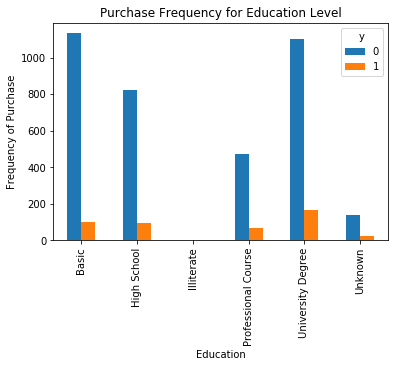

In [11]:
pd.crosstab(bank.education, bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Education Level')
plt.xlabel('Education')
plt.ylabel('Frequency of Purchase')

We can see that the frequency of purchase of the deposit depends on Education level which in turn can be a good indicator to the outcome variable

** Visualizing using stack bar ** to illustrate the proportion of the buyers in each marital status

In [12]:
table = pd.crosstab(bank.marital, bank.y)
table.sum(1)

marital
divorced     446
married     2509
single      1153
unknown       11
dtype: int64

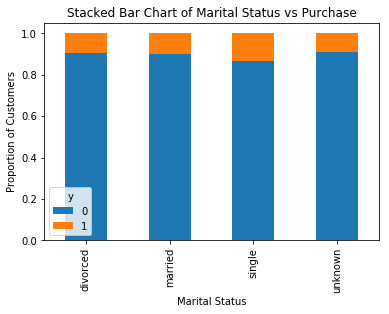

In [13]:
table.div(table.sum(1).astype(float),axis =0).plot(kind='bar',stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

Intuitively, the frequency of deposit purchase is similar for each group which might be helpful in predicting the outcome. We check ** frequency of purchase ** against ** each day of week **.

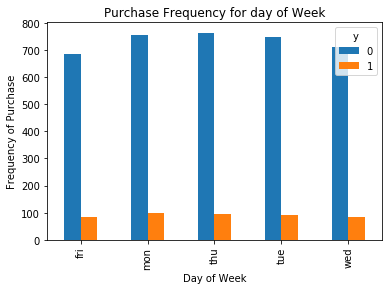

In [14]:
pd.crosstab(bank.day_of_week,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')

This plot shows that the frequency of the positive outcome varies depending on the month of the years, hence it might be a good predictor of the outcome. Let see the histogram of Age

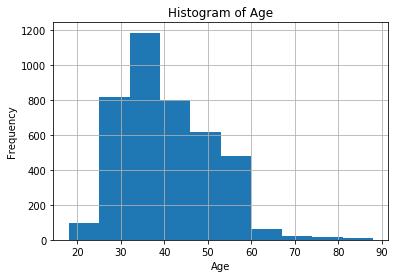

In [15]:
bank.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

This plot suggests the most customers of the bank are in the age range of 30-40. Let visualize the bar chart of Poutcome and the frequency of purchase

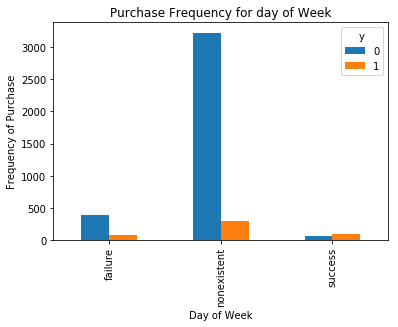

In [16]:
pd.crosstab(bank.poutcome,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')

In [17]:
bank.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [18]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,High School,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,High School,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


## Transforming category into numeric values
** bank ** dataset contains several categorical attributes which will be transformed as following

In [19]:
cat_vars = bank.select_dtypes(include=['object']).copy()
cat_vars.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,Basic,no,yes,no,cellular,may,fri,nonexistent
1,services,single,High School,no,no,no,telephone,may,fri,nonexistent
2,services,married,High School,no,yes,no,telephone,jun,wed,nonexistent
3,services,married,Basic,no,unknown,unknown,telephone,jun,fri,nonexistent
4,admin.,married,University Degree,no,yes,no,cellular,nov,mon,nonexistent


In [20]:
for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(bank[var],prefix=var)
    bank1 = bank.join(cat_list)
    bank = bank1

In [21]:
to_keep = [i for i in bank.columns.values.tolist() if i not in cat_vars]


In [22]:
bank_final = bank[to_keep]
bank_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [23]:
bank_final_vars = bank_final.columns.values.tolist()
Y=['y']
X=[i for i in bank_final_vars if i not in Y]

## Feature selection
When a large number of features, computational power is wasted. One solution is to select only informative features. Here we will experiment with RFE (** Recursive Feature Elimination **) method from feature selection

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()

In [26]:
np.ravel(bank_final[Y])

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
n_cols= 12
rfe = RFE(model,n_cols)
rfe = rfe.fit(bank_final[X],np.ravel(bank_final[Y]))
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True False False False  True False False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True False  True False False False False False False  True False
  True]
[34 42 18 45  1 14 27 25  1 40 22  3  1 36  2 38  1  5 30 32 12 46 19 44 31
 50 26 13 48 21 41  8 35 33 49 20  6 10 15  9 23 16  4 39 24  1  1  1  1  1
 17  1 47 37 28 43 29 11  1  7  1]


The output has attribute ** support ** contains ** True ** for selecting features which has the value of ranking 1. If we want to include more than ** n_cols **,in the model, we can select the columns with the rank 2 onward.

** The seleted columns by this method are **:

In [28]:
cols=np.array(X)[rfe.support_]
cols

array(['previous', 'euribor3m', 'job_entrepreneur', 'job_self-employed',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_oct', 'poutcome_failure', 'poutcome_success'],
      dtype='<U29')

In [29]:
X=bank_final[cols]
Y=bank_final['y']

## Implement model

In [30]:
import statsmodels.api as sm
logit_model =sm.Logit(Y,X)
result = logit_model.fit()
result.summary()

C:\Users\trisi\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.279180
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4119
Model:                          Logit   Df Residuals:                     4107
Method:                           MLE   Df Model:                           11
Date:                Mon, 15 Jan 2018   Pseudo R-squ.:                  0.1918
Time:                        19:00:08   Log-Likelihood:                -1149.9
converged:                       True   LL-Null:                       -1422.9
                                        LLR p-value:                4.975e-110
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
previous              0.3493      0.141      2.475      0.013       0.073       0.626
euribor3m            -0.6253      0.026    -23.615      0.000      -0.677      -0.573
job_entrepreneur     -0.4842      0.382     -1.269      0.205      -1.232       0.264
job_self-employed    -0.4626      0.328     -1.413      0.158      -1.105       0.179
month_dec             0.7147      0.466      1.533      0.125      -0.199       1.628
month_jul             0.3280      0.184      1.781      0.075      -0.033       0.689
month_jun             0.3431      0.169      2.031      0.042       0.012       0.674
month_mar             1.0612      0.315      3.367      0.001       0.443       1.679
month_may            -1.0490      0.126     -8.302      0.000      -1.297      -0.801
month_oct             0.0707      0.270      0.262      0.793      -0.458       0.600
poutcome_failure     -1.0450      0.245     -4.260      0.000      -1.526      -0.564
poutcome_success      0.7788      0.289      2.697      0.007       0.213       1.345
=====================================================================================
"""

One advantage of this method is that p-values are calculated automatically in the resul summary while sklearn method does not have this feature.

In [31]:
# Using sklearn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,Y)
lr.score(X,Y)

0.90216071862102454

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state=1234)
lr = LogisticRegression()
lr.fit(X_train,y_train)
probs = lr.predict_proba(X_test)

By default, if this probability is more than 0.5, then the observation is classified as a positive outcome, otherwise a negative.

In [33]:
# We can predict the class with
preds = lr.predict(X_test)

To change the threshold

In [34]:
prob_df = pd.DataFrame(probs[:,1])
prob_df['predict']= np.where(prob_df[0]>0.1,1,0)
prob_df.head()

,0,predict
0,0.770428,1
1,0.059264,0
2,0.069205,0
3,0.160543,1
4,0.336525,1


## Implement cross validation

In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr,X,Y,scoring='accuracy',cv=8)

In [36]:
scores.mean()

0.90239763992129463

In [37]:
from sklearn.metrics import roc_curve
probs

array([[ 0.22957188,  0.77042812],
       [ 0.94073608,  0.05926392],
       [ 0.93079459,  0.06920541],
       ..., 
       [ 0.95854267,  0.04145733],
       [ 0.93076486,  0.06923514],
       [ 0.92808298,  0.07191702]])

In [38]:
from ggplot import *
prob = lr.predict_proba(X_test)[:,1]
fpr, sensitivity, _= roc_curve(y_test,prob)
df = pd.DataFrame(dict(fpr=fpr,sensitivity=sensitivity))
ggplot(df,aes(x=fpr,y=sensitivity)) + geom_line() + geom_abline(linetype='dashed')


ModuleNotFoundError: No module named 'husl'